### 😂استدعيت كل المكتبات الي لقيتها في وشي 

In [3]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

Using TensorFlow backend.


### بعدين جبت الداتا الي حادرب الموديل عليها

In [33]:
trainBats = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory('train/',target_size=(150,150),batch_size=20,class_mode='binary')

Found 322 images belonging to 2 classes.


In [34]:
valisBats = ImageDataGenerator().flow_from_directory('valid/',target_size=(150,150),batch_size=20,class_mode='binary')

Found 100 images belonging to 2 classes.


### بعدين عملت الموديل الي طلع عيني 😡 قعدت اغير فيه واضيف واحذف يومين لحد ما اخيرا عرفت اعمل موديل اداني دقه اعلى من 50 في الميه 

In [35]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [36]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

### هنا كنت بادرب الموديل كل مره بعد ما اغير فيه

In [37]:
model.fit_generator(trainBats,steps_per_epoch=16,validation_data=valisBats,validation_steps=5,epochs=30)

Epoch 1/30
16/16 [==============================] - 49s 3s/step - loss: 0.6952 - acc: 0.5437 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/30
16/16 [==============================] - 35s 2s/step - loss: 0.6969 - acc: 0.5296 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/30
16/16 [==============================] - 42s 3s/step - loss: 0.7001 - acc: 0.4704 - val_loss: 8.0038 - val_acc: 0.5000
Epoch 4/30
16/16 [==============================] - 43s 3s/step - loss: 0.6941 - acc: 0.5094 - val_loss: 2.2916 - val_acc: 0.7400
Epoch 5/30
16/16 [==============================] - 38s 2s/step - loss: 0.6859 - acc: 0.5672 - val_loss: 7.6969 - val_acc: 0.5000
Epoch 6/30
16/16 [==============================] - 40s 3s/step - loss: 0.6732 - acc: 0.6066 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/30
16/16 [==============================] - 41s 3s/step - loss: 0.6803 - acc: 0.5735 - val_loss: 2.7663 - val_acc: 0.7600
Epoch 8/30
16/16 [==============================] - 37s 2s/step - loss: 0.6711 - acc: 0.55

### لما اخيرا بدأت الدقه تزيد رحت حفظته ورجعت حملته تاني وكملت تدريب عليه اديته 100 لفه كمان

In [38]:
model.save('gng_small.h5')

In [10]:
model = keras.models.load_model('gng_small.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [41]:
model.fit_generator(trainBats,steps_per_epoch=16,validation_data=valisBats,validation_steps=5,epochs=100)

Epoch 1/100
16/16 [==============================] - 44s 3s/step - loss: 0.4542 - acc: 0.8167 - val_loss: 5.8008 - val_acc: 0.6400
Epoch 2/100
16/16 [==============================] - 39s 2s/step - loss: 0.3829 - acc: 0.8307 - val_loss: 2.7105 - val_acc: 0.8300
Epoch 3/100
16/16 [==============================] - 40s 3s/step - loss: 0.4173 - acc: 0.8213 - val_loss: 5.6396 - val_acc: 0.6500
Epoch 4/100
16/16 [==============================] - 35s 2s/step - loss: 0.4380 - acc: 0.8087 - val_loss: 4.6690 - val_acc: 0.7100
Epoch 5/100
16/16 [==============================] - 36s 2s/step - loss: 0.4027 - acc: 0.8432 - val_loss: 4.6725 - val_acc: 0.7100
Epoch 6/100
16/16 [==============================] - 36s 2s/step - loss: 0.4136 - acc: 0.8401 - val_loss: 4.0260 - val_acc: 0.7500
Epoch 7/100
16/16 [==============================] - 36s 2s/step - loss: 0.4069 - acc: 0.8181 - val_loss: 1.9330 - val_acc: 0.8800
Epoch 8/100
16/16 [==============================] - 39s 2s/step - loss: 0.3739 - a

In [42]:
model.save('gng_small.h5')

In [4]:
model = keras.models.load_model('gng_small.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)       147584    
__________

### 😍واخيرا الموديل اشتغل 😍

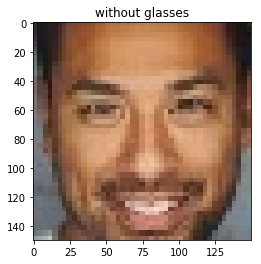

In [5]:
import matplotlib.pyplot as plt
image_path="Faces/0.jpg"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
if result[0][0] == 0:
    plt.title('with glasses')
else:
    plt.title('without glasses')

plt.show()

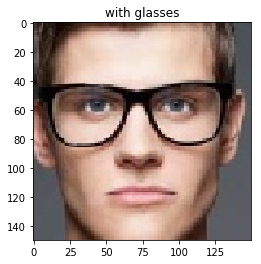

In [7]:
import matplotlib.pyplot as plt
image_path="Faces/2.jpg"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
if result[0][0] == 0:
    plt.title('with glasses')
else:
    plt.title('without glasses')

plt.show()

### دا كود صغير عملته ايام الفيجن كنت باطلع بيه الوشوش من الصور

In [1]:
import cv2
import glob
import numpy as np
import os

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

# مسار الصوره اللي عايز تطلع الوش منها
i = 0
path = os.path.join('test/', '*g')
files = glob.glob(path)

for fl in files:
    img = cv2.imread(fl)
    img = cv2.resize(img, (int(img.shape[1] / 2), int(img.shape[0] / 2)), 0, 0, cv2.INTER_LINEAR)
    #img = img.astype(np.float32)
    #if img.shape[1] >= 2000:
     #   img = cv2.resize(img, (int(img.shape[1] / 2), int(img.shape[0] / 2)))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.5, 2)
    for (x, y, w, h) in faces:
        sub_face = img[y:y + h, x:x + w]
        # هنا بيكريت اسم الصور الصغيره اللي بتطلع وبيحطهم في فولدر Faces
        FaceFileName = 'Faces/' + str(i) + '.jpg'
        cv2.imwrite(FaceFileName, sub_face)
        i += 1

    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0, 0), 1)

